INTRODUCTION

This dataset contains information on 4,024 breast cancer patients, including their age, tumor characteristics, hormone receptor status, and survival outcomes. It can be used for analyzing risk factors and predicting patient survival.

IMPORT LABARIES AND LOAD DATASET

In [1]:
#logistic regression 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

df=pd.read_csv(r"C:\Data Science\data_set\Breast_Cancer.csv")
print(df)





      Age   Race Marital Status T Stage  N Stage 6th Stage  \
0      68  White        Married       T1      N1       IIA   
1      50  White        Married       T2      N2      IIIA   
2      58  White       Divorced       T3      N3      IIIC   
3      58  White        Married       T1      N1       IIA   
4      47  White        Married       T2      N1       IIB   
...   ...    ...            ...      ...     ...       ...   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0         Poorly differentiated     3  Regional           4        Positive   
1     Moderately differentiated     2  Regional          35        Positive   
2     Moderately d

DATA CLEANING 

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [3]:
df.isna().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
le=LabelEncoder()
colum=['Race','N Stage','6th Stage','Estrogen Status','Progesterone Status','Status','T Stage ']
for col in colum:
    df[col]=le.fit_transform(df[col])
df.head(10)


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,2,Married,0,0,0,Poorly differentiated,3,Regional,4,1,1,24,1,60,0
1,50,2,Married,1,1,2,Moderately differentiated,2,Regional,35,1,1,14,5,62,0
2,58,2,Divorced,2,2,4,Moderately differentiated,2,Regional,63,1,1,14,7,75,0
3,58,2,Married,0,0,0,Poorly differentiated,3,Regional,18,1,1,2,1,84,0
4,47,2,Married,1,0,1,Poorly differentiated,3,Regional,41,1,1,3,1,50,0
5,51,2,Single,0,0,0,Moderately differentiated,2,Regional,20,1,1,18,2,89,0
6,51,2,Married,0,0,0,Well differentiated,1,Regional,8,1,1,11,1,54,0
7,40,2,Married,1,0,1,Moderately differentiated,2,Regional,30,1,1,9,1,14,1
8,40,2,Divorced,3,2,4,Poorly differentiated,3,Regional,103,1,1,20,18,70,0
9,69,2,Married,3,2,4,Well differentiated,1,Distant,32,1,1,21,12,92,0


DATA VISUALIZATION BY FINDING CORREALTION BETWEEN THE DATAS 

                          Age      Race  T Stage    N Stage  Tumor Size  \
Age                  1.000000  0.079646 -0.066675  0.003042   -0.077069   
Race                 0.079646  1.000000  0.001184 -0.032065   -0.004019   
T Stage             -0.066675  0.001184  1.000000  0.276903    0.809160   
N Stage              0.003042 -0.032065  0.276903  1.000000    0.277832   
Tumor Size          -0.077069 -0.004019  0.809160  0.277832    1.000000   
Estrogen Status      0.059728  0.057627 -0.060894 -0.101959   -0.059546   
Progesterone Status -0.021387  0.034307 -0.057526 -0.093658   -0.069812   
Survival Months     -0.009224  0.040640 -0.085904 -0.139696   -0.087016   
Status               0.056036 -0.050000  0.154615  0.255724    0.134147   

                     Estrogen Status  Progesterone Status  Survival Months  \
Age                         0.059728            -0.021387        -0.009224   
Race                        0.057627             0.034307         0.040640   
T Stage        

<Axes: >

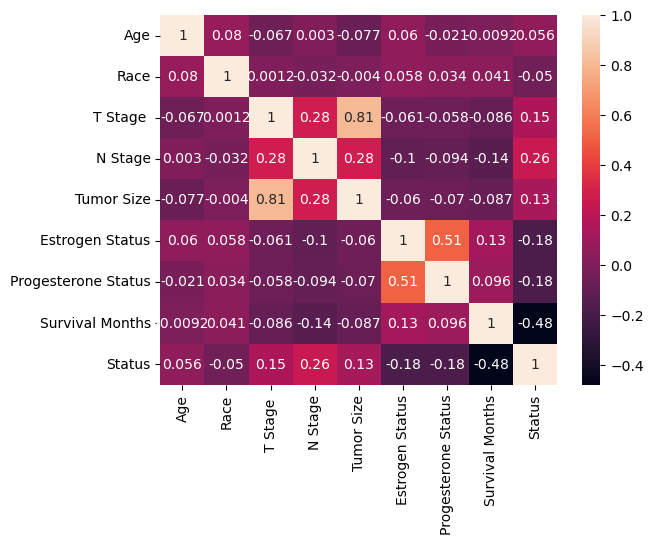

In [7]:
cor=df[['Age','Race','T Stage ','N Stage','Tumor Size','Estrogen Status','Progesterone Status','Survival Months','Status']].corr()
print(cor)
sns.heatmap(cor,annot=True)


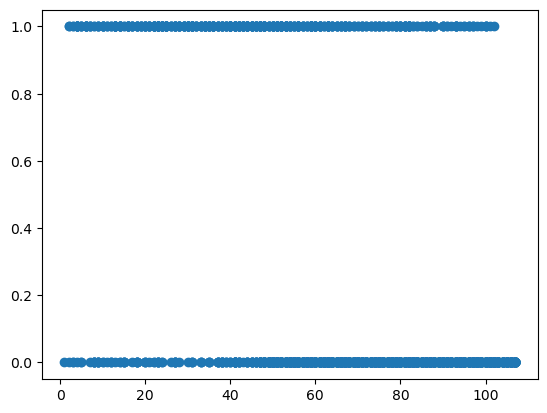

In [8]:
plt.scatter(df['Survival Months'],df['Status'])
plt.show()

EXTRACTING INDEPENDENT AND DEPENDENT VARIABLES 

In [9]:
x=df[['Age','Race','T Stage ','N Stage','Tumor Size','Estrogen Status','Progesterone Status','Survival Months']]
x=pd.DataFrame(x)
y=df['Status']
y=pd.DataFrame(y)

SPLITING DATA INTO TRAIN AND TEST DATA

In [10]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=56)

FEATURE SCALING 

In [11]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_test=st.fit_transform(x_test)
x_train=st.fit_transform(x_train)


MODEL BUILIDING AND EVALUATE PREDICTIONS 

MODEL OF LOGISTIC REGRESSION

In [12]:
model=LogisticRegression(multi_class='multinomial',random_state=0)
model.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [13]:
y_predict=model.predict(x_test)
print(y_predict)
print(y_test)

[1 0 0 ... 0 0 0]
      Status
2323       1
251        0
645        0
2268       0
2997       0
...      ...
1115       0
2435       0
3911       0
1818       0
999        0

[1006 rows x 1 columns]


In [14]:
print("mean squared error of logistic regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy of logistic regression:",metrics.accuracy_score(y_predict,y_test)*100)

mean squared error of logistic regression: 0.11530815109343936
accuracy of logistic regression: 88.46918489065607


MODEL OF SVM

In [15]:
from sklearn.svm import SVC
model1=SVC(kernel='linear',random_state=67)
model1.fit(x_train,y_train)

SVC(kernel='linear', random_state=67)

In [16]:
y_predict=model1.predict(x_test)
print(y_predict)
print(y_test)

[1 0 0 ... 0 0 0]
      Status
2323       1
251        0
645        0
2268       0
2997       0
...      ...
1115       0
2435       0
3911       0
1818       0
999        0

[1006 rows x 1 columns]


In [17]:
print("mse of svm:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy of svm:",metrics.accuracy_score(y_predict,y_test)*100)

mse of svm: 0.11928429423459244
accuracy of svm: 88.07157057654076


MODEL OF RANDOM FOREST

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=10)
model2.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=10)

In [19]:
y_predict=model2.predict(x_test)
print(y_predict)
print(y_test)

[1 0 0 ... 0 0 0]
      Status
2323       1
251        0
645        0
2268       0
2997       0
...      ...
1115       0
2435       0
3911       0
1818       0
999        0

[1006 rows x 1 columns]


In [20]:
print("mse of random forest:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy of random forest:",metrics.accuracy_score(y_predict,y_test)*100)

mse of random forest: 0.1172962226640159
accuracy of random forest: 88.27037773359841


MODEL OF DECISION TREE

In [21]:

from sklearn.tree import DecisionTreeClassifier
model4=DecisionTreeClassifier(criterion='entropy',random_state=0)
model4.fit(x_train,y_train)




DecisionTreeClassifier(criterion='entropy', random_state=0)

In [22]:
y_predict=model4.predict(x_test)
print(y_test)
print(y_predict)

      Status
2323       1
251        0
645        0
2268       0
2997       0
...      ...
1115       0
2435       0
3911       0
1818       0
999        0

[1006 rows x 1 columns]
[1 0 0 ... 0 0 0]


In [23]:
print("mse of decision tree:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy of decision tree:",metrics.accuracy_score(y_predict,y_test)*100)

mse of decision tree: 0.17693836978131214
accuracy of decision tree: 82.30616302186878


MODEL OF KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)


KNeighborsClassifier()

In [25]:
y_predict=classifier.predict(x_test)
print(y_test)
print(y_predict)

      Status
2323       1
251        0
645        0
2268       0
2997       0
...      ...
1115       0
2435       0
3911       0
1818       0
999        0

[1006 rows x 1 columns]
[1 0 0 ... 0 0 0]


In [26]:
print("mse value of knn regression:",metrics.mean_squared_error(y_predict,y_test))
print("accuracy in knn regression:",metrics.accuracy_score(y_predict,y_test))

mse value of knn regression: 0.12226640159045726
accuracy in knn regression: 0.8777335984095428


SUMMARY

This project aimed to predict analyzing risk factors and predicting patient survival by using given informations from dataset..After processing ,we tested  multiple model ,inculding logistic regression ,Decision tree, Random forest,SVM,KNN.The Logistic regression model achieved the highest accuracy of 88.46,making it the best performing model..